<a href="https://colab.research.google.com/github/Nehaasati/DSA_1/blob/master/signal_sign11_tenserflow_with_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMAGE_SIZE = [224, 224]

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
train_path = '/content/drive/My Drive/gtsrb-german-traffic-sign/Train'
valid_path = '/content/drive/My Drive/gtsrb-german-traffic-sign/Test'


In [0]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


In [0]:
for layer in resnet.layers:
  layer.trainable = False

In [0]:
folders = glob('/content/drive/My Drive/gtsrb-german-traffic-sign/Train/*')
  

In [0]:
x = Flatten()(resnet.output)

In [0]:
prediction = Dense(len(folders), activation='softmax')(x)

In [0]:
model = Model(inputs=resnet.input, outputs=prediction)


In [0]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [0]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/gtsrb-german-traffic-sign/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 14238 images belonging to 43 classes.


In [0]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/gtsrb-german-traffic-sign/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1446 images belonging to 43 classes.


In [0]:
#r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=5, validation_steps=2000)`
  """


Epoch 1/5
  1/250 [..............................] - ETA: 1:15:15 - loss: 5.5675 - accuracy: 0.0312

KeyboardInterrupt: ignored

In [0]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
445/445 [==============================] - 2950s 7s/step - loss: 0.2308 - accuracy: 0.9922 - val_loss: 66.5738 - val_accuracy: 0.0290
Epoch 2/5
445/445 [==============================] - 2951s 7s/step - loss: 0.2766 - accuracy: 0.9927 - val_loss: 43.5791 - val_accuracy: 0.0290
Epoch 3/5
445/445 [==============================] - 2951s 7s/step - loss: 0.2247 - accuracy: 0.9938 - val_loss: 43.5130 - val_accuracy: 0.0290
Epoch 4/5
445/445 [==============================] - 2946s 7s/step - loss: 0.2332 - accuracy: 0.9937 - val_loss: 43.4572 - val_accuracy: 0.0332
Epoch 5/5
445/445 [==============================] - 2950s 7s/step - loss: 0.3090 - accuracy: 0.9940 - val_loss: 84.3838 - val_accuracy: 0.0290


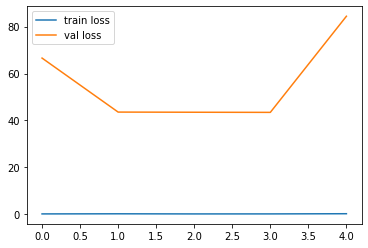

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')